<a href="https://colab.research.google.com/github/richapandey118/Amazon-Review-Analysis/blob/main/Amazon_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/amazon_reviews_datasets_50.csv')


In [ ]:
df

,ReviewID,ProductID,UserID,Rating,ReviewText,ReviewDate
0,R001,B07QWE9876,U1002,NaN,"Great product, highly recommend!",2024-01-01
1,R002,B08LMN4321,U1001,0,Very useful and handy. ### @@@,2024-01-02
2,R003,B08LMN4321,U2001,1,Would not buy again.,2024-01-03
3,R004,B07QWE9876,U2002,1,"Average quality, expected better. ### @@@",2025/99/12
4,R005,B08LMN4321,U2001,3,NaN,2024-01-05
5,R006,B07QWE9876,U1002,2,Not worth the price. ### !!!,NaN
6,R007,B08LMN4321,U2001,4,"Great product, highly recommend! ### ???",2024-01-07
7,R008,B07ABC1234,U1001,2,Exceeded my expectations!,2024-01-08
8,R009,B07QWE9876,U2002,3,Would not buy again.,NaN
9,R010,B07ABC1234,U2003,5,"Terrible, broke within a week.",2024-01-10


In [ ]:
print(df['Rating'].dtype)
print(df['Rating'].unique())


object
[nan '0' '1' '3' '2' '4' '5' 'five' '6']


In [ ]:
text_to_num = {'five': 5}

df['Rating'] = df['Rating'].replace(text_to_num)


In [ ]:
df

,ReviewID,ProductID,UserID,Rating,ReviewText,ReviewDate
0,R001,B07QWE9876,U1002,NaN,"Great product, highly recommend!",2024-01-01
1,R002,B08LMN4321,U1001,0,Very useful and handy. ### @@@,2024-01-02
2,R003,B08LMN4321,U2001,1,Would not buy again.,2024-01-03
3,R004,B07QWE9876,U2002,1,"Average quality, expected better. ### @@@",2025/99/12
4,R005,B08LMN4321,U2001,3,NaN,2024-01-05
5,R006,B07QWE9876,U1002,2,Not worth the price. ### !!!,NaN
6,R007,B08LMN4321,U2001,4,"Great product, highly recommend! ### ???",2024-01-07
7,R008,B07ABC1234,U1001,2,Exceeded my expectations!,2024-01-08
8,R009,B07QWE9876,U2002,3,Would not buy again.,NaN
9,R010,B07ABC1234,U2003,5,"Terrible, broke within a week.",2024-01-10


In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


In [ ]:
df

,ReviewID,ProductID,UserID,Rating,ReviewText,ReviewDate
0,R001,B07QWE9876,U1002,NaN,"Great product, highly recommend!",2024-01-01
1,R002,B08LMN4321,U1001,0.0,Very useful and handy. ### @@@,2024-01-02
2,R003,B08LMN4321,U2001,1.0,Would not buy again.,2024-01-03
3,R004,B07QWE9876,U2002,1.0,"Average quality, expected better. ### @@@",2025/99/12
4,R005,B08LMN4321,U2001,3.0,NaN,2024-01-05
5,R006,B07QWE9876,U1002,2.0,Not worth the price. ### !!!,NaN
6,R007,B08LMN4321,U2001,4.0,"Great product, highly recommend! ### ???",2024-01-07
7,R008,B07ABC1234,U1001,2.0,Exceeded my expectations!,2024-01-08
8,R009,B07QWE9876,U2002,3.0,Would not buy again.,NaN
9,R010,B07ABC1234,U2003,5.0,"Terrible, broke within a week.",2024-01-10


In [ ]:
import numpy as np


In [ ]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)


/tmp/ipython-input-3488600736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [ ]:
df

,ReviewID,ProductID,UserID,Rating,ReviewText,ReviewDate
0,R001,B07QWE9876,U1002,3.086957,"Great product, highly recommend!",2024-01-01
1,R002,B08LMN4321,U1001,0.000000,Very useful and handy. ### @@@,2024-01-02
2,R003,B08LMN4321,U2001,1.000000,Would not buy again.,2024-01-03
3,R004,B07QWE9876,U2002,1.000000,"Average quality, expected better. ### @@@",2025/99/12
4,R005,B08LMN4321,U2001,3.000000,NaN,2024-01-05
5,R006,B07QWE9876,U1002,2.000000,Not worth the price. ### !!!,NaN
6,R007,B08LMN4321,U2001,4.000000,"Great product, highly recommend! ### ???",2024-01-07
7,R008,B07ABC1234,U1001,2.000000,Exceeded my expectations!,2024-01-08
8,R009,B07QWE9876,U2002,3.000000,Would not buy again.,NaN
9,R010,B07ABC1234,U2003,5.000000,"Terrible, broke within a week.",2024-01-10


In [ ]:
df['Rating'] = df['Rating'].round().astype(int)


In [ ]:
df

,ReviewID,ProductID,UserID,Rating,ReviewText,ReviewDate
0,R001,B07QWE9876,U1002,3,"Great product, highly recommend!",2024-01-01
1,R002,B08LMN4321,U1001,0,Very useful and handy. ### @@@,2024-01-02
2,R003,B08LMN4321,U2001,1,Would not buy again.,2024-01-03
3,R004,B07QWE9876,U2002,1,"Average quality, expected better. ### @@@",2025/99/12
4,R005,B08LMN4321,U2001,3,NaN,2024-01-05
5,R006,B07QWE9876,U1002,2,Not worth the price. ### !!!,NaN
6,R007,B08LMN4321,U2001,4,"Great product, highly recommend! ### ???",2024-01-07
7,R008,B07ABC1234,U1001,2,Exceeded my expectations!,2024-01-08
8,R009,B07QWE9876,U2002,3,Would not buy again.,NaN
9,R010,B07ABC1234,U2003,5,"Terrible, broke within a week.",2024-01-10


In [ ]:
print(df['Rating'].unique())
print(df['Rating'].isnull().sum())


[3 0 1 2 4 5 6]
0


In [ ]:
df['ReviewText'].fillna("No Review")


,ReviewText
0,"Great product, highly recommend!"
1,Very useful and handy. ### @@@
2,Would not buy again.
3,"Average quality, expected better. ### @@@"
4,No Review
5,Not worth the price. ### !!!
6,"Great product, highly recommend! ### ???"
7,Exceeded my expectations!
8,Would not buy again.
9,"Terrible, broke within a week."


In [ ]:
import re

In [ ]:
df['ReviewText'] = df['ReviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [ ]:
df['ReviewText'] = df['ReviewText'].str.strip()


In [ ]:
print(df['ReviewText'])


0                Great product highly recommend
1                         Very useful and handy
2                           Would not buy again
3               Average quality expected better
4                                     No Review
5                           Not worth the price
6                Great product highly recommend
7                      Exceeded my expectations
8                           Would not buy again
9                  Terrible broke within a week
10                                    No Review
11             Terrible broke within a week 123
12                         Good value for money
13                                    No Review
14               Great product highly recommend
15                          Would not buy again
16                 Terrible broke within a week
17                          Not worth the price
18                          Not worth the price
19    Fast delivery satisfied with the purchase
20                 Terrible broke within

In [ ]:
df

,ReviewID,ProductID,UserID,Rating,ReviewText,ReviewDate
0,R001,B07QWE9876,U1002,3,Great product highly recommend,2024-01-01
1,R002,B08LMN4321,U1001,0,Very useful and handy,2024-01-02
2,R003,B08LMN4321,U2001,1,Would not buy again,2024-01-03
3,R004,B07QWE9876,U2002,1,Average quality expected better,2025/99/12
4,R005,B08LMN4321,U2001,3,No Review,2024-01-05
5,R006,B07QWE9876,U1002,2,Not worth the price,NaN
6,R007,B08LMN4321,U2001,4,Great product highly recommend,2024-01-07
7,R008,B07ABC1234,U1001,2,Exceeded my expectations,2024-01-08
8,R009,B07QWE9876,U2002,3,Would not buy again,NaN
9,R010,B07ABC1234,U2003,5,Terrible broke within a week,2024-01-10


In [ ]:
duplicates = df.duplicated()
print(duplicates.sum())


0


In [ ]:
print(df['ProductID'].duplicated().sum())
print(df['UserID'].duplicated().sum())


45
42


In [ ]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
duplicate_rows = df[df['ReviewID'].duplicated(keep=False)]
print(duplicate_rows)


Empty DataFrame
Columns: [ReviewID, ProductID, UserID, Rating, ReviewText, ReviewDate]
Index: []
Empty DataFrame
Columns: [ReviewID, ProductID, UserID, Rating, ReviewText, ReviewDate]
Index: []


In [ ]:
df

,ReviewID,ProductID,UserID,Rating,ReviewText,ReviewDate
0,R001,B07QWE9876,U1002,3,Great product highly recommend,2024-01-01
1,R002,B08LMN4321,U1001,0,Very useful and handy,2024-01-02
2,R003,B08LMN4321,U2001,1,Would not buy again,2024-01-03
3,R004,B07QWE9876,U2002,1,Average quality expected better,2025/99/12
4,R005,B08LMN4321,U2001,3,No Review,2024-01-05
5,R006,B07QWE9876,U1002,2,Not worth the price,NaN
6,R007,B08LMN4321,U2001,4,Great product highly recommend,2024-01-07
7,R008,B07ABC1234,U1001,2,Exceeded my expectations,2024-01-08
8,R009,B07QWE9876,U2002,3,Would not buy again,NaN
9,R010,B07ABC1234,U2003,5,Terrible broke within a week,2024-01-10


In [ ]:
default_date = pd.to_datetime("2025-09-28")


In [ ]:
df['ReviewDate'].fillna(default_date)


,ReviewDate
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2025/99/12
4,2024-01-05
5,2025-09-28 00:00:00
6,2024-01-07
7,2024-01-08
8,2025-09-28 00:00:00
9,2024-01-10


In [ ]:
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'], errors='coerce')


In [ ]:
df['ReviewDate']

,ReviewDate
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,NaT
4,2024-01-05
5,NaT
6,2024-01-07
7,2024-01-08
8,NaT
9,2024-01-10


In [ ]:

df['ReviewDate'].fillna('2025-09-24')


,ReviewDate
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2025-09-24
4,2024-01-05
5,2025-09-24
6,2024-01-07
7,2024-01-08
8,2025-09-24
9,2024-01-10


In [ ]:
df['ReviewDate'] = df['ReviewDate'].fillna('2025-09-24')


In [ ]:
df['ReviewDate'].dtype


dtype('<M8[ns]')

In [ ]:
df['ReviewDate']

,ReviewDate
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2025-09-24
4,2024-01-05
5,2025-09-24
6,2024-01-07
7,2024-01-08
8,2025-09-24
9,2024-01-10


In [ ]:
df

,ReviewID,ProductID,UserID,Rating,ReviewText,ReviewDate
0,R001,B07QWE9876,U1002,3,Great product highly recommend,2024-01-01
1,R002,B08LMN4321,U1001,0,Very useful and handy,2024-01-02
2,R003,B08LMN4321,U2001,1,Would not buy again,2024-01-03
3,R004,B07QWE9876,U2002,1,Average quality expected better,2025-09-24
4,R005,B08LMN4321,U2001,3,No Review,2024-01-05
5,R006,B07QWE9876,U1002,2,Not worth the price,2025-09-24
6,R007,B08LMN4321,U2001,4,Great product highly recommend,2024-01-07
7,R008,B07ABC1234,U1001,2,Exceeded my expectations,2024-01-08
8,R009,B07QWE9876,U2002,3,Would not buy again,2025-09-24
9,R010,B07ABC1234,U2003,5,Terrible broke within a week,2024-01-10


In [ ]:
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [ ]:
df[df.duplicated()]


,ReviewID,ProductID,UserID,Rating,ReviewText,ReviewDate


In [ ]:
df[df.duplicated(subset=['ReviewID', 'UserID'])]


,ReviewID,ProductID,UserID,Rating,ReviewText,ReviewDate


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


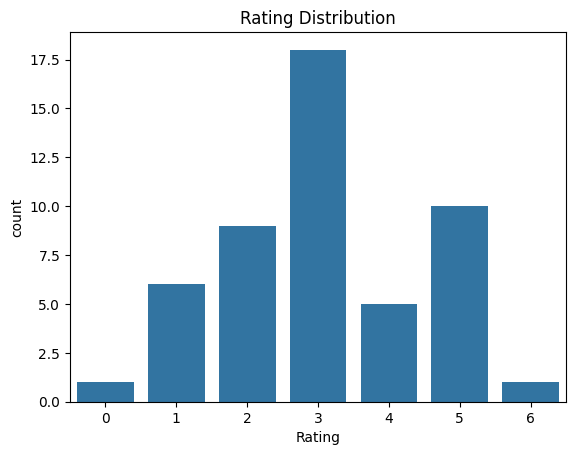

In [ ]:
sns.countplot(x='Rating', data=df)
plt.title("Rating Distribution")
plt.show()


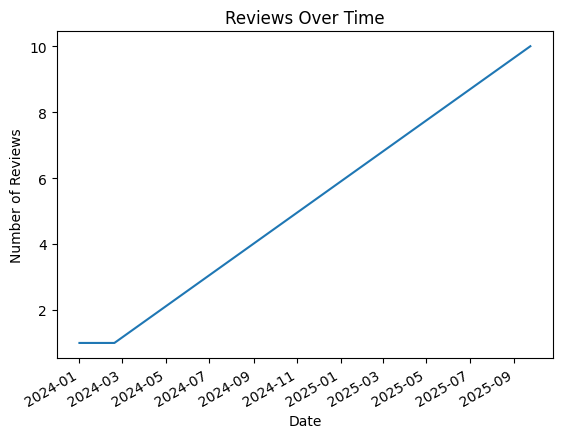

In [ ]:
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])
df.groupby('ReviewDate').size().plot(kind='line')
plt.title("Reviews Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.show()


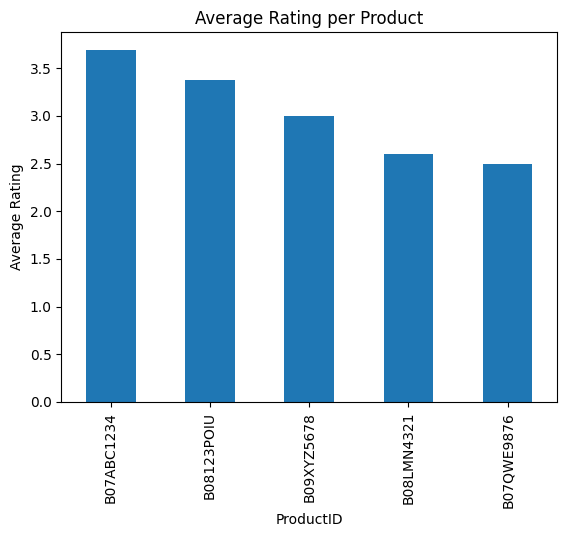

In [ ]:
avg_rating = df.groupby('ProductID')['Rating'].mean().sort_values(ascending=False)
avg_rating.plot(kind='bar')
plt.title("Average Rating per Product")
plt.ylabel("Average Rating")
plt.show()


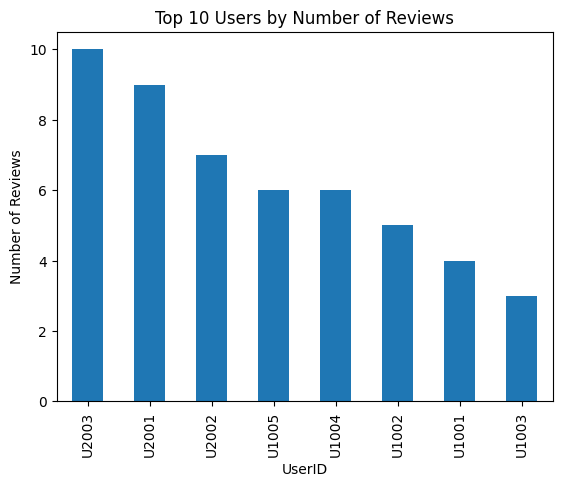

In [ ]:
top_users = df['UserID'].value_counts().head(10)
top_users.plot(kind='bar')
plt.title("Top 10 Users by Number of Reviews")
plt.ylabel("Number of Reviews")
plt.show()


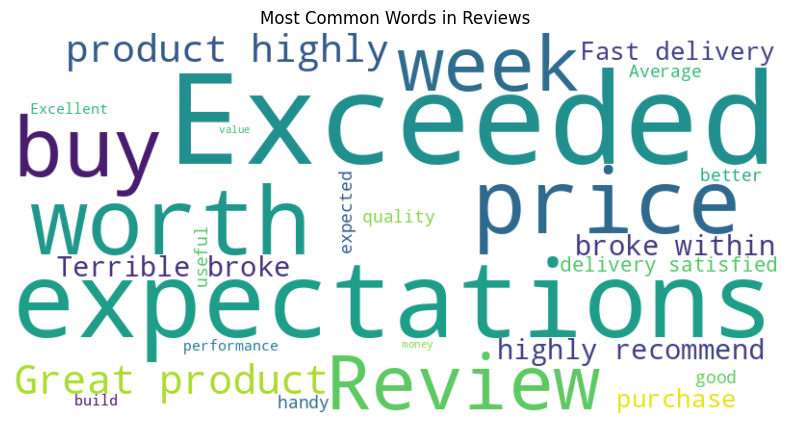

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['ReviewText'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews")
plt.show()
